# <center> Udacity Data Analysis Nanodegree </center>
   ## <center> Project: WeRateDogs Twitter Data </center>
   ### <center> Noaman Mangera, July 2020 <center>




## Table of Contents
<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#asses">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='gather'></a>

## Gather
### General Properties 

In [344]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#### Twitter Archive

In [345]:
# read in locally sourced file
twitter_archive = pd.read_csv(r'C:\Users\noama\twitter-archive-enhanced-2.csv')

In [346]:
#visually inspect first five rows of twitter_archive
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [347]:
# number of columns and rows in the data set
print("This dataset has " + str(twitter_archive.shape[0]) + " observations" + " and " + str(twitter_archive.shape[1]) + " columns") 

This dataset has 2356 observations and 17 columns


In [348]:
# display column names, data types and number of missing data in the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Image Predictions File

In [349]:
# point request library in the direction of the url, and download tsv file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open(r'C:\Users\noama\image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)

In [350]:
# read in image predictions data as dataframe
image_predictions = pd.read_csv(r'C:\Users\noama\image-predictions-3.tsv', sep='\t')

In [351]:
#visually inspect first five rows of image_predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [352]:
# number of columns and rows in the image_predictions dataset
print("The image predictions dataset has " + str(image_predictions.shape[0]) + " observations" + "and " + str(image_predictions.shape[1]) + " columns") 

The image predictions dataset has 2075 observationsand 12 columns


In [353]:
# display column names, data types and number of missing data in the image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Twitter API

In [354]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [355]:
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [356]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [357]:
#create empty dateframe with column headers
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

#read json file line by line into dataFrame with tweet_id, retweet_count, favorite_count
with open(r'C:\Users\noama\tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

In [358]:
#visually inspect first five rows of df_tweet_json dataframe
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [359]:
# number of columns and rows in the df_tweet_json dataset
print("The image predictions dataset has " + str(df_tweet_json.shape[0]) + " observations" + "and " + str(df_tweet_json.shape[1]) + " columns") 

The image predictions dataset has 2354 observationsand 3 columns


In [360]:
# display column names, data types and number of missing data in the df_tweet_json dataframe
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


<a id='asses'></a>
## Assess  

### Quality

In [361]:
#visually inspect a random selection of 5 rows
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None


In [362]:
# display column names, data types and number of missing data in the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [363]:
#descriptive statistics
twitter_archive.describe().round()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.0,2356.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.0,10.0
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,46.0,7.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.0,0.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.0,10.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.0,10.0
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.0,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.0,170.0


In [364]:
#visually inspect a random selection of 5 rows
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
719,685906723014619143,https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg,1,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True
541,677187300187611136,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg,1,English_setter,0.282396,True,Shih-Tzu,0.084112,True,Old_English_sheepdog,0.059538,True


In [365]:
# display column names, data types and number of missing data in the image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [366]:
#descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [367]:
#visually inspect a random selection of 5 rows
df_tweet_json.sample(5)

,tweet_id,retweet_count,favorite_count
1567,687807801670897665,801,2625
1980,672968025906282496,602,1405
94,873697596434513921,12518,0
276,840370681858686976,5146,17918
2205,668627278264475648,123,341


In [368]:
# display column names, data types and number of missing data in the df_tweet_json dataframe
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [369]:
#descriptive statistics 
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,670815497391357952,3652,0
freq,1,5,179


### Missing Data

In [370]:
#user defined function to calculate and display number missing values
def missing_values(df):
    '''
    Function that aggregates missing values values and creates an output table with two columns
    one with the count and the other a percentage of total values for that column.
    '''
    miss_val = df.isnull().sum()
    miss_val_perc = (df.isnull().sum() / len(df)) * 100
    miss_val_table = pd.concat([miss_val, miss_val_perc], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("The selected dataframe has a total of " + str(df.shape[1]) + " columns, of which " + str(miss_val_table_ren_columns.shape[0]) + " contain missing values.")
    return miss_val_table_ren_columns

In [371]:
missing_values(twitter_archive)

The selected dataframe has a total of 17 columns, of which 6 contain missing values.


,Missing Values,% of Total Values
in_reply_to_status_id,2278,96.7
in_reply_to_user_id,2278,96.7
retweeted_status_id,2175,92.3
retweeted_status_user_id,2175,92.3
retweeted_status_timestamp,2175,92.3
expanded_urls,59,2.5


In [372]:
missing_values(image_predictions)

The selected dataframe has a total of 12 columns, of which 0 contain missing values.


,Missing Values,% of Total Values


In [373]:
missing_values(df_tweet_json)

The selected dataframe has a total of 3 columns, of which 0 contain missing values.


,Missing Values,% of Total Values


### Duplicates

In [374]:
#count of more than one instance of tweet_id (unique key)
sum(twitter_archive.tweet_id.duplicated())

0

In [375]:
#count of more than one instance of tweet_id (unique key)
sum(image_predictions.tweet_id.duplicated())

0

In [376]:
#count of more than one instance of tweet_id (unique key)
sum(df_tweet_json.tweet_id.duplicated())

0

In [377]:
#identify retweets (not all are original)
retweets = twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### Outliers

In [378]:
#count numnber of unique spelling of names
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Taco            1
Newt            1
Howie           1
Sage            1
Brandonald      1
Name: name, Length: 957, dtype: int64

In [379]:
# find observations where name is given in lowercase
twitter_archive.loc[twitter_archive['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [380]:
#count numnber of unique sources
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [381]:
#count numnber of unique values for the numerator rating
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [382]:
#count numnber of unique values for the denominator rating
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [383]:
#extract numerator and denominator rating using pattern matching, and join each column to end of twitter archive dataset
twitter_archive[['numerator_test', 'denominator_test']] = twitter_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [384]:
#convert data type of newly created rating test columns
twitter_archive['numerator_test'] = twitter_archive['numerator_test'].astype(float)
twitter_archive['denominator_test'] = twitter_archive['denominator_test'].astype(float)

In [385]:
#perform logical test to identify, and isolate obervastions where there is a mismatch between supplied numerator rating values and regex extracted ratings 
twitter_archive.loc[twitter_archive['rating_numerator'] != twitter_archive['numerator_test']] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator_test,denominator_test
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.50,10.0
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27,10.0
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,9.50,10.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26,10.0


In [386]:
#perform logical test to identify, and isolate obervastions where there is a mismatch between supplied denomiator rating values and regex extracted ratings 
twitter_archive.loc[twitter_archive['rating_denominator'] != twitter_archive['denominator_test']] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator_test,denominator_test


### Tidiness

In [387]:
#count numnber of unique dog type in doggo column
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [388]:
#count numnber of unique dog type in floofer column
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [389]:
#count numnber of unique dog type in pupper column
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [390]:
#count numnber of unique dog type in puppo column
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

## Summary

#### Quality

1. Some tweets do not have images (expanded_urls)	
2. Values in the source column have extranous info	
3. Missing values encoded as "None" in the name column	
4. Contains retweets
5. Incorrect data types for columns: retweeted_status_timestamp, timestamp, dog_stage, tweet_id, in_reply_to_status_id, in_reply_to_user_id, rating_numerator, and rating_denominator, retweet_count and favorite_count    
6. Values under the name column given in lowercase are unlikley to be actual dog names such as "quite", "such", and "a"
7. Ambigious column names: p1, p2, p3
8. Extreme (unlikely) values in the rating_numertor and rating_denominator columns	
9. Rating_numerator column contains anomalous values
10. Columns not relevant to analysis present 

#### Tidiness

1. Dog stage uneccesarily split into four columns: doggo, floofer, pupper and puppo. 
2. Data split over three datasets:  twitter_archive, image_predictions and df_tweet_json.


<a id='clean'></a>
## Clean

In [391]:
# make a copy of dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

**Define**

Merge 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'

**Code**

In [392]:
# replace 'None' entries with empty string
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge multiple dog stage columns into one
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# identify and label multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'

# assign empty strings as missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [393]:
#display column names, data types and missing values
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [394]:
#count number of each dog_stage
twitter_archive_clean['dog_stage'].value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stage, dtype: int64

**Define**

Merge twitter_archive, image_predictions and df_tweet_json into one dataset

**Code**

In [395]:
#column wise join twitter_archive with image_predictions on common field (tweet_id)
archive_image_merge = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id')

In [396]:
#convert tweet_id in df_tweet_json_clean dataframw to float data type
df_tweet_json_clean['tweet_id'] = df_tweet_json_clean['tweet_id'].astype(float) 

In [397]:
#column wise join archive_imagine_merge with df_tweet_json_clean on common field (tweet_id)
df = archive_image_merge.merge(df_tweet_json_clean, on='tweet_id')

**Test**

In [398]:
#number of rows and columns in twitter_archive dataframe
twitter_archive.shape

(2356, 19)

In [399]:
#number of rows and columns in image_predictions dataframe
image_predictions_clean.shape

(2075, 12)

In [400]:
#number of rows and columns in  archive_imagine_merge dataframe
archive_image_merge.shape

(2075, 31)

In [401]:
#number of rows and columns in df_tweet_json_clean dataframe
df_tweet_json_clean.shape

(2354, 3)

In [402]:
#number of rows and columns in complete dataframe
df.shape

(1349, 33)

**Define**

Remove records where dog name is lowercase, i.e invalid

**Code**

In [403]:
# subset for observations where given dog name is uppercase
df = df.loc[df['name'] != df['name'].str.lower()]

**Test**

In [404]:
df['name'].value_counts()

None       392
Oliver       8
Winston      7
Tucker       7
Cooper       6
          ... 
Mister       1
Thor         1
Rontu        1
Mike         1
Eevee        1
Name: name, Length: 656, dtype: int64

**Define**

Change missing values in 'name' from 'None' to NaN

**Code**

In [405]:
df['name'] = df['name'].replace('None', np.NaN)

**Test**

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1343
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1282 non-null   int64  
 1   in_reply_to_status_id       15 non-null     float64
 2   in_reply_to_user_id         15 non-null     float64
 3   timestamp                   1282 non-null   object 
 4   source                      1282 non-null   object 
 5   text                        1282 non-null   object 
 6   retweeted_status_id         48 non-null     float64
 7   retweeted_status_user_id    48 non-null     float64
 8   retweeted_status_timestamp  48 non-null     object 
 9   expanded_urls               1282 non-null   object 
 10  rating_numerator            1282 non-null   int64  
 11  rating_denominator          1282 non-null   int64  
 12  name                        890 non-null    object 
 13  doggo                       1282 

**Define**

Strip extraneous information from source column to make it more human friendly

**Code**

In [407]:
# Remove url from source column
df['source'] = df['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df['source'] = df['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df['source'] = df['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df['source'] = df['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test**

In [408]:
# count number of categories in source column
df.source.value_counts()

Twitter for iPhone    1257
Twitter Web Client      17
TweetDeck                8
Name: source, dtype: int64

**Define**

Remove rows where there are no expanded_urls (images)

**Code**

In [409]:
#drop rows with missing values in the expanded_urls column
df = df.dropna(subset=['expanded_urls'])

**Test**

In [410]:
#count number of records with no images
sum(df['expanded_urls'].isnull())

0

**Define**

Remove retweets

**Code**

In [411]:
#identify and isolate for records with no retweeted_status_ids (original)
df = df[df['retweeted_status_id'].isnull()]

**Test**

In [412]:
#display column names, data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1343
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1234 non-null   int64  
 1   in_reply_to_status_id       15 non-null     float64
 2   in_reply_to_user_id         15 non-null     float64
 3   timestamp                   1234 non-null   object 
 4   source                      1234 non-null   object 
 5   text                        1234 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1234 non-null   object 
 10  rating_numerator            1234 non-null   int64  
 11  rating_denominator          1234 non-null   int64  
 12  name                        862 non-null    object 
 13  doggo                       1234 

**Define**

Change timestamp and retweeted_status_timestamp columns to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings

**Code**

In [413]:
#convert columns identified to correct data types
df['tweet_id'] = df['tweet_id'].astype('str')
df['in_reply_to_status_id'] = df['in_reply_to_status_id'].astype('str')
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].astype('str')
df['retweeted_status_timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['rating_numerator'] = df['rating_numerator'].astype(float)
df['rating_denominator'] = df['rating_denominator'].astype(float)
df['dog_stage'] = df['dog_stage'].astype('category')
df['in_reply_to_status_id'] = df['in_reply_to_status_id'].astype('str')
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].astype('str')
df['retweet_count'] = df['retweet_count'].astype(int)
df['favorite_count'] = df['favorite_count'].astype(int)

**Test**

In [414]:
#display column names, data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1343
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1234 non-null   object             
 1   in_reply_to_status_id       1234 non-null   object             
 2   in_reply_to_user_id         1234 non-null   object             
 3   timestamp                   1234 non-null   datetime64[ns, UTC]
 4   source                      1234 non-null   object             
 5   text                        1234 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  1234 non-null   datetime64[ns, UTC]
 9   expanded_urls               1234 non-null   object             
 10  rating_numerator            1234 non-null   float64         

**Define**

Remove implausible (extreme) values from the ratings_numerator and ratings_denominator columns

**Code**

In [415]:
#identify and only keep values less than 100 and not zero 
df = df[df['rating_numerator'] != 0 ]
df = df[df['rating_denominator'] <= 100 ]
df = df[df['rating_numerator'] <= 100 ]

**Test**

In [416]:
#count number of values over 100 in rating_numerator column
len(df[df['rating_numerator'] > 100 ])

0

In [417]:
#count number of values over 100 in rating_denominator column
len(df[df['rating_denominator'] > 100 ])

0

**Define**

Replace anomolous values in rating_numerator column with correct values 

**Code**

In [418]:
#replace erroneous values with correctly extracted ones
df['rating_numerator'] = df['numerator_test'] 

**Test**

In [419]:
#logical test to check for mismatch in regex extracted rating values with values in rating numerator column
df.loc[df['rating_numerator'] != df['numerator_test']] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


**Define**

Change column names from neural network output to something more explicit

**Code**

In [420]:
#rename column p1, p2, and p3
df = df.rename(columns={'p1':'Breed_Probability1', 'p2':'Breed_Probability2', 'p3':'Breed_Probability3'})
df = df.rename(columns={'p1_conf':'Breed_Confidence1', 'p2_conf':'Breed_Confidence2', 'p3_conf':'Breed_Confidence3'})
df = df.rename(columns={'p1_dog':'Dog_Flag_1', 'p2_dog':'Dog_Flag_2', 'p3_dog':'Dog_Flag_3'})

**Test**

In [421]:
#display column names
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'numerator_test', 'denominator_test', 'dog_stage', 'jpg_url', 'img_num',
       'Breed_Probability1', 'Breed_Confidence1', 'Dog_Flag_1',
       'Breed_Probability2', 'Breed_Confidence2', 'Dog_Flag_2',
       'Breed_Probability3', 'Breed_Confidence3', 'Dog_Flag_3',
       'retweet_count', 'favorite_count'],
      dtype='object')

**Define**

Drop superflous columns

**Code**

In [422]:
#create list of column names
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo', 'numerator_test', 'denominator_test']

#drop columns in list 
df = df.drop(columns, axis=1)

**Test**

In [424]:
#display data type and columns names of final tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1343
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1229 non-null   object             
 1   in_reply_to_status_id  1229 non-null   object             
 2   in_reply_to_user_id    1229 non-null   object             
 3   timestamp              1229 non-null   datetime64[ns, UTC]
 4   source                 1229 non-null   object             
 5   text                   1229 non-null   object             
 6   expanded_urls          1229 non-null   object             
 7   rating_numerator       1229 non-null   float64            
 8   rating_denominator     1229 non-null   float64            
 9   name                   861 non-null    object             
 10  dog_stage              197 non-null    category           
 11  jpg_url                1229 non-null   object           

<a id='conclusion'></a>
## Conclusions

### Store

In [425]:
# Store cleaned DataFrame in a csv file
df.to_csv('./twitter_archive_master.csv', index=False)

### Analysis

In [426]:
#statistical summary of numerical variables
df.describe().round(2)

,rating_numerator,rating_denominator,img_num,Breed_Confidence1,Breed_Confidence2,Breed_Confidence3,retweet_count,favorite_count
count,1229.00,1229.00,1229.00,1229.00,1229.00,1229.00,1229.00,1229.00
mean,10.67,10.12,1.19,0.59,0.14,0.06,2607.41,8495.85
std,3.37,2.47,0.55,0.27,0.10,0.05,4000.79,11147.37
min,1.00,7.00,1.00,0.04,0.00,0.00,16.00,81.00
25%,10.00,10.00,1.00,0.35,0.05,0.02,619.00,1860.00
50%,11.00,10.00,1.00,0.58,0.12,0.05,1323.00,3999.00
75%,12.00,10.00,1.00,0.84,0.20,0.09,3131.00,10943.00
max,88.00,80.00,4.00,1.00,0.47,0.27,56625.00,107015.00


**Observations**

1. The bulk of the distribution for the variable rating_numerator is between 10 and 12, suggesting a rating within this range can be considered "normal".
2. The median value for Breed_Confidence1 is multiple times larger than its counterpart for Breed_Confidence2 and Breed_Confidence3, suggesting  the results of the neural network should be weighted toward its primary estimation.
3. A more than doubling is required to move from the 25th percentile to the 50th percentile (and from the 50th percentile to the 75th percentile) for the variable favorite_count, suggesting an exponential relationship. Said otherwise, popular dogs garner vastly more attention than their less aesthetically-pleasing compatriots. 

### Visualisation

In [427]:
#create correlation matrix using numerical data
cor = df[['rating_numerator', 'rating_denominator', 'Breed_Confidence1', 'Breed_Confidence2', 
          'Breed_Confidence3', 'retweet_count', 'favorite_count']].corr()
cor

,rating_numerator,rating_denominator,Breed_Confidence1,Breed_Confidence2,Breed_Confidence3,retweet_count,favorite_count
rating_numerator,1.000000,0.751999,0.103165,-0.027231,-0.038707,0.183269,0.242858
rating_denominator,0.751999,1.000000,0.028493,-0.040815,-0.018425,-0.015906,-0.023633
Breed_Confidence1,0.103165,0.028493,1.000000,-0.507884,-0.699339,0.083864,0.114619
Breed_Confidence2,-0.027231,-0.040815,-0.507884,1.000000,0.470115,-0.019904,-0.011812
Breed_Confidence3,-0.038707,-0.018425,-0.699339,0.470115,1.000000,-0.053322,-0.054011
retweet_count,0.183269,-0.015906,0.083864,-0.019904,-0.053322,1.000000,0.914050
favorite_count,0.242858,-0.023633,0.114619,-0.011812,-0.054011,0.914050,1.000000


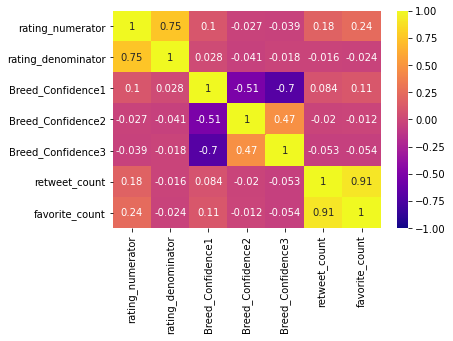

In [428]:
#create heatmap of correlation between numerical variables
sns.heatmap(cor, annot=True, cmap='plasma', vmin=-1, vmax=1);

**Observations**

retweet_count and favorite_count are weakly correlated with rating_numerator, suggesting a difference in evaluations of 'likeability' and/or "popularity" between WeRateDogs and its audience.
